# Line Charts

The <a href="https://www.bls.gov/">United States Bureau of Labor Statistics</a> (BLS) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate <a href="https://en.wikipedia.org/wiki/Unemployment#Limitations_of_the_unemployment_definition">isn't perfect</a>, it's a commonly used proxy for the health of the economy. You may have heard politicians and reporters state the unemployment rate when commenting on the economy. You can read more about how the BLS calculates the unemployment rate <a href="http://www.bls.gov/cps/cps_htgm.htm">here</a>.

The BLS releases monthly unemployment data available for download as an Excel file, with the `.xlsx` file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file from the website of the <a href="https://www.stlouisfed.org/">Federal Reserve Bank of St. Louis. </a> We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as `unrate.csv`, and made it available in this mission.

In [2]:
import pandas as pd

unrate = pd.read_csv("unrate.csv")

In [3]:
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


The dataset we'll be working with is a <a href ="https://en.wikipedia.org/wiki/Time_series">time series</a> dataset, which means the data points (monthly unemployment rates) are ordered by time.

We need to convert this column to the `datetime` type using the `pandas.to_datetime()` function, which returns a Series object with the datetime data type that we can assign back to the DataFrame

#### Convert column to `datetime` type: 
> `df['col'] = pd.to_datetime(df['col'])`

In [4]:
# convert the DATE column into a series of datetime values
unrate.DATE = pd.to_datetime(unrate.DATE)

# display the first 12 columns
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


The first 12 rows reflect the **unemployment rate** from *January 1948* to *December 1948*. The values seem to fluctuate throughout the months. In addition, March and December appears to have the highest rate of unemployment.

In 1948:

- monthly unemployment ranged from `3.4` to `4.0`
- *highest* unemployment rate was reached in both **March** and **December**
- *lowest* unemployment rate was reached in **January**

Trend analysis:

- from `January` to `March`, unemployment rate trended **up**
- from `March` to `May`, unemployment rate trended **down**
- from `May` to `August`, unemployment rate trended **up**
- from `August` to `October`, unemployment rate trended **down**
- from `October` to `December`, unemployment rate trended **up**

Every few months, the unemployment rate switches between trending up and trending down and this could mean that there's a seasonal effect. To prove this, we'll compare the unemployment trends across many years so we can decide if we should investigate further.

**`Seasonality`** is when a pattern is observed on a regular, predictable basis for a specific reason.



<a href="https://en.wikipedia.org/wiki/Plot_%28graphics%29">Plots</a> are a category of visual representations that allow us to easily understand the relationships between variables.
![](https://s3.amazonaws.com/dq-content/line_plot_basics.png)

Line charts work best when there is a **logical connection** between **adjacent points**. In our case, that connection is the flow of time. Between 2 reported monthly unemployment values, the unemployment rate is fluctuating and time is passing. To emphasize how the visual representation of the line chart helps us observe trends easily, let's look at the same 12 data points from 1948 as a line chart.

![](https://s3.amazonaws.com/dq-content/unemp_line_plot.png)

We can reach the same observations about the data from the line chart as we did from the table representation:

> In 1948:
- *highest* unemployment rate was reached in both **March** and **December**

![](https://s3.amazonaws.com/dq-content/unemp_plot_observations.png)

To create the `line chart`, we'll use the <a href="http://matplotlib.org/">**matplotlib**</a> library, which allows us to:

- quickly create common plots using high-level functions
- extensively tweak plots
- create new kinds of plots from the ground up

To help you become familiar with matplotlib, we'll focus on the first 2 use cases. When working with commonly used plots in matplotlib, the *general workflow* is:

- *`create`* a plot using data
- *`customize`* the appearance of the plot
- *`display`* the plot
- *`edit and repeat`* until satisfied

#### Create and display plot with `pyplot`: 
> `import matplotlib.pyplot as plt` <br>
> `plt.plot(x_values, y_values)`<br>
> `plt.show()`

To create a line chart of the unemployment data from 1948, we need:
- the x-axis to range from `01-01-1948` to `12-01-1948`
- the y-axis to range from `3.4` to `4.0`

#### Customise plot:
- Coordonate grid (*x-axis*, *y-axis*)
    - the default values for the coordinate grid is ranging from `-0.06` to `0.06` with no gridlines and no data
    - to generate the line chart we're interested in, we pass in the list of *x-values* as the *first parameter* and the list of *y-values* as the *second parameter* to `plot()`
![](https://s3.amazonaws.com/dq-content/axis+ticks.png)

- Tick labels (*rotation*)
    - we can rotate the x-axis labels by 90 degrees so they don't overlap. The `x-ticks()` function within pyplot lets us customise the behaviour of the x-axis ticks
    

- Lables and Title
    - `xlabel(string)`: accepts a string value which is set as the x-axis label
    - `ylabel(string)`: accepts a string value, which is set as the y-axis label
    
    - `title(string)`: accepts a string value, which is set as the plot title



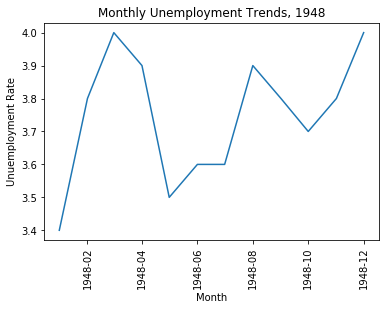

In [9]:
# import pyplot module
import matplotlib.pyplot as plt

# renders the plots in the Jupyter notebook
%matplotlib inline

# generate a line chart that visualizes the unemployment rates from 1948
plt.plot(unrate.DATE.iloc[:12], unrate.VALUE.iloc[:12])

plt.xticks(rotation=90) # rotate the horizontal ticks by 90 degrees
plt.xlabel("Month") # set x-axis label
plt.ylabel("Unuemployment Rate") # set y-axis label
plt.title("Monthly Unemployment Trends, 1948") # set plot title

# display the plot
plt.show()